In [1]:
from parameters import *
from functions import *
from PDE_solutions import *
walks = 5000
N = 200

# Control variate

I think that is wrong, since we don't know muY

In [2]:
#define another velocity field
def u_control(X) :
    return np.array([u1,u2])

def ControlVariate(X0, N, T):
    ''' X0: initial position
        N: number of steps
        T: Final time'''
    X = []
    dt = T/N
    sigmaSqrtDt = sigma * np.sqrt(dt)
    X.append(X0)
    finalT = dt
    for i in range(N-1):
        X0 = X0 + u_control(X0) * dt + sigmaSqrtDt* norm.rvs(size=2)
        X.append(X0)
        finalT = finalT + dt
        r = np.sqrt( X0[0]**2 + X0[1]**2 )
        if(r<R):
            break
    
    return np.asarray(X), finalT

# Check if there is some POSITIVE correlation (heuristic)

1.0000000000000007
1.0000000000000007


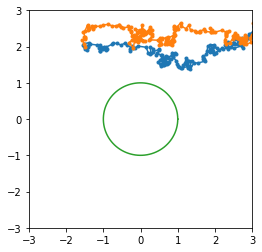

In [3]:
X, finalTime1 = NaiveRandomWalk(X0, N, T)
Y, finalTime2 = ControlVariate(X0, N, T)

#plots the walk
plt.figure(figsize=[4,4])
X = X.T
plt.plot(X[0,:],X[1,:], '.-')
Y = Y.T
plt.plot(Y[0,:],Y[1,:], '.-')
plt.xlim([-3,3])
plt.ylim([-3,3])

#plots the well
theta = np.linspace(0,2*np.pi,100)
plt.plot(R*np.cos(theta),R*np.sin(theta))
print(finalTime1)
print(finalTime2)

In [5]:
polluted = np.zeros(walks)

Z = np.zeros(walks)
Y = np.zeros(walks)

start = time.time()

for w in range(walks):
    if (w%1000 == 0):
        print('Current walk: ', w )

    _, finalT_Z = NaiveRandomWalk(X0, N, T)
    if finalT_Z < 1:
            Z[w] = 1
    
    _, finalT_Y = ControlVariate(X0, N, T)
    if finalT_Y < 1:
            Y[w] = 1

muY = np.mean(Y)
sigmaY = np.std(Y, ddof = 1)
sigma_xy = np.sum( (Y - muY) * (Z - np.mean(Z)) )/(N-1)
alpha_opt = -sigma_xy/sigmaY
Z_alpha = Z + alpha_opt*(Y - muY)
    
end = time.time()


mean = np.mean(Z_alpha)
std = np.std(Z_alpha, ddof = 1)

confidence = 0.95
LB, UB = CI(mean, std, walks, confidence)

print(f'\n\n\nNumber of simulations: {walks}. Time needed = {end - start}')
print(f'The estimated probability at {X0} is: {mean} (using MC), {PDEProb} (using the PDE)')
print(f'Confidence interval: [ {mean} +- {UB-mean} ]\twith P = {confidence}%')

print(f'\n\n\nEstimated std gain: {np.std(Z, ddof = 1)} - {std} = {np.std(Z, ddof = 1) - std}')


Current walk:  0
Current walk:  1000
Current walk:  2000
Current walk:  3000
Current walk:  4000



Number of simulations: 5000. Time needed = 112.44769763946533
The estimated probability at [-1.5, 2.0] is: 0.0876 (using MC), 0.0980219 (using the PDE)
Confidence interval: [ 0.0876 +- 0.007850288294691934 ]	with P = 0.95%



Estimated std gain: 0.2827405673858796 - 0.2831505131210791 = -0.0004099457351994795


We don't obtain good results, this is probably due to the fact that we are estimating also muY. 